2. 코로나 시계열 데이터로 다음을 수행하시오.

- 데이터 불러오기

In [14]:
import pandas as pd
import numpy as np
data=pd.read_csv("서울특별시 코로나19.csv")

In [15]:
data.head(5)

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649


In [16]:
#날짜 컬럼 제외
data1=data[data.columns.difference(['날짜'])]
data1.head(5)

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,136200,121926,75118,148359,132305,96008,109973,63687,135361,82254,...,81018,116862,176765,115771,110293,55376,119150,37261,33753,103288
1,132333,118842,72934,143573,127626,93474,106162,61840,130878,79677,...,79030,113609,172292,111900,106171,53872,115116,36216,32835,100255
2,128813,115846,70754,139633,124805,91030,103573,59946,127299,77878,...,76802,110583,167386,109290,104109,52391,112560,35276,31878,97419
3,126296,113549,70003,137908,123374,89876,102610,59393,125120,76542,...,76108,109500,165373,107582,102916,51652,110620,34879,31577,96359
4,123992,110649,68329,134285,120413,87770,99938,57925,121314,75119,...,74178,106437,161650,104991,100349,50720,108254,34061,30903,93690


(1) ACF를 사용해서 distance를 계산하시오.

In [4]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

In [5]:
data1.transpose().to_numpy()

array([[136200, 132333, 128813, ...,      0,      0,      0],
       [121926, 118842, 115846, ...,      0,      0,      0],
       [ 75118,  72934,  70754, ...,      0,      0,      0],
       ...,
       [ 37261,  36216,  35276, ...,      0,      3,      3],
       [ 33753,  32835,  31878, ...,      0,      0,      0],
       [103288, 100255,  97419, ...,      0,      1,      1]], dtype=int64)

In [6]:
#ACF distance
def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags=n_lags)

n_lags=785
#np.repeat(반복할값, 반복횟수)
lag_arr=np.repeat(n_lags, data1.shape[1])
acf_list=list(map(acf, data1.transpose().to_numpy(), lag_arr))
acf_df=pd.DataFrame(acf_list).transpose()
acf_df.columns=data1.columns

acf_df

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965594,0.964788,0.964873,0.963102,0.964599,0.965118,0.964896,0.964495,0.962739,0.964677,...,0.964843,0.964386,0.965216,0.963406,0.964211,0.965807,0.963757,0.965624,0.966025,0.964429
2,0.931913,0.930000,0.930425,0.927079,0.930349,0.930705,0.930870,0.929726,0.926474,0.930168,...,0.930035,0.929349,0.930854,0.927777,0.929708,0.932148,0.928512,0.932172,0.932933,0.929547
3,0.898790,0.895648,0.896665,0.891603,0.896316,0.896734,0.897198,0.895662,0.890730,0.895849,...,0.895739,0.894822,0.897147,0.892371,0.895164,0.899075,0.893408,0.899077,0.900435,0.895251
4,0.865697,0.861294,0.862291,0.855502,0.861660,0.862274,0.862796,0.860914,0.854712,0.861332,...,0.860691,0.859554,0.862857,0.856622,0.860051,0.865682,0.858069,0.865542,0.867391,0.860302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.016955,-0.015228,-0.015857,-0.015340,-0.016273,-0.015231,-0.016170,-0.015477,-0.015416,-0.015638,...,-0.015171,-0.015739,-0.015392,-0.015053,-0.016447,-0.017232,-0.015876,-0.017175,-0.017212,-0.016019
781,-0.013717,-0.012334,-0.012831,-0.012420,-0.013163,-0.012320,-0.013083,-0.012523,-0.012501,-0.012644,...,-0.012270,-0.012738,-0.012449,-0.012183,-0.013303,-0.013929,-0.012845,-0.013889,-0.013915,-0.012970
782,-0.010415,-0.009360,-0.009726,-0.009417,-0.009972,-0.009335,-0.009909,-0.009490,-0.009491,-0.009589,...,-0.009290,-0.009646,-0.009434,-0.009239,-0.010075,-0.010562,-0.009744,-0.010519,-0.010542,-0.009829
783,-0.007044,-0.006323,-0.006586,-0.006374,-0.006742,-0.006309,-0.006704,-0.006427,-0.006425,-0.006479,...,-0.006282,-0.006522,-0.006380,-0.006246,-0.006808,-0.007144,-0.006586,-0.007108,-0.007135,-0.006652


(2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오.

계층적 군집분석의 입력형태를 맞추기 위해 acf_df를 transpose한다.

In [7]:
acf_df=acf_df.transpose()
acf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
강남구,1.0,0.965594,0.931913,0.898790,0.865697,0.832537,0.801510,0.769774,0.738757,0.709541,...,-0.031448,-0.028760,-0.025982,-0.023050,-0.020016,-0.016955,-0.013717,-0.010415,-0.007044,-0.003576
강동구,1.0,0.964788,0.930000,0.895648,0.861294,0.827337,0.794486,0.761769,0.729945,0.699790,...,-0.028260,-0.025833,-0.023348,-0.020731,-0.018012,-0.015228,-0.012334,-0.009360,-0.006323,-0.003204
강북구,1.0,0.964873,0.930425,0.896665,0.862291,0.828221,0.792955,0.759475,0.726817,0.695380,...,-0.029677,-0.027141,-0.024501,-0.021740,-0.018874,-0.015857,-0.012831,-0.009726,-0.006586,-0.003344
강서구,1.0,0.963102,0.927079,0.891603,0.855502,0.819774,0.785463,0.750681,0.716584,0.683842,...,-0.028518,-0.026075,-0.023540,-0.020883,-0.018134,-0.015340,-0.012420,-0.009417,-0.006374,-0.003242
관악구,1.0,0.964599,0.930349,0.896316,0.861660,0.827261,0.794470,0.761023,0.728057,0.696761,...,-0.030343,-0.027721,-0.025020,-0.022177,-0.019242,-0.016273,-0.013163,-0.009972,-0.006742,-0.003435


In [8]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path="C:/Windows/Fonts/NGULIM.TTF"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

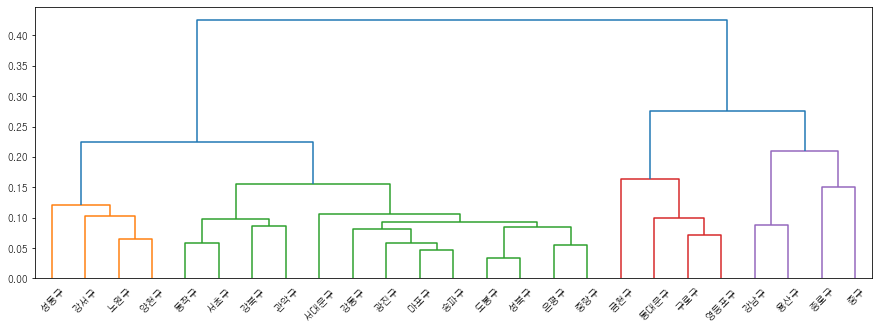

In [9]:
plt.figure(figsize=(15,5))
label=acf_df.index
dend1=sch.linkage(acf_df, method='average')
cutoff=0.5*max(dend1[:,2])
dend_res1=sch.dendrogram(dend1, color_threshold=cutoff, labels=label)
plt.show()